In [10]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(".."))

from extract_ingest.ingest import Ingestor
from data_preprocessing.type_convert import TypeConvert

In [14]:
from analyze.basic_data_inspection import DataInspector, DataSummaryInspectionStrategy, DataTypeInspectionStrategy
from analyze.missing_value import SimpleMisssingValueAnalysis
from analyze.univariate_analysis import UnivariateAnalyzer
from analyze.bivariate_analysis import BivariateAnalyzer
from analyze.multivariate_analysis import SimpleMultivariateAnalysis

In [54]:
ingest = Ingestor()
df = ingest.ingest("C:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\extracted_data\household_power_consumption.txt")

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ratho\AppData\Local\Temp\ipykernel_15600\3237331455.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = ingest.ingest("C:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\extracted_data\household_power_consumption.txt")
c:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\extract_ingest\ingest.py:25: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filePath, delimiter=';')


In [55]:
numeric_cols = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
]

convert = TypeConvert()
df = convert.convert(df, numeric_cols, "numeric")
df = convert.convert(df, ['Date'], "datetime")

c:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\data_preprocessing\type_convert.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors="coerce")


In [ ]:
df['Datetime'] = df['Datetime'].dt.floor('H')

agg_sum = df.groupby('Datetime')[[
    'Global_active_power', 
    'Global_reactive_power', 
    'Global_intensity', 
    'Sub_metering_1', 
    'Sub_metering_2', 
    'Sub_metering_3'
]].sum().reset_index()

agg_mean = df.groupby('Datetime')[['Voltage']].mean().reset_index()

df = pd.merge(agg_sum, agg_mean, on='Datetime')

C:\Users\ratho\AppData\Local\Temp\ipykernel_15600\4005143719.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Datetime'] = df['Datetime'].dt.floor('H')


In [57]:
df

,Datetime,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage
0,2006-12-16 17:00:00,152.024,8.244,651.6,0.0,19.0,607.0,234.643889
1,2006-12-16 18:00:00,217.932,4.802,936.0,0.0,403.0,1012.0,234.580167
2,2006-12-16 19:00:00,204.014,5.114,870.2,0.0,86.0,1001.0,233.232500
3,2006-12-16 20:00:00,196.114,4.506,835.0,0.0,0.0,1007.0,234.071500
4,2006-12-16 21:00:00,183.388,4.600,782.8,0.0,25.0,1033.0,237.158667
...,...,...,...,...,...,...,...,...
34584,2010-11-26 17:00:00,103.554,3.684,433.0,0.0,0.0,772.0,237.069667
34585,2010-11-26 18:00:00,94.408,3.222,397.2,0.0,0.0,0.0,237.531833
34586,2010-11-26 19:00:00,99.560,3.602,423.4,0.0,4.0,0.0,236.741000
34587,2010-11-26 20:00:00,69.822,3.670,294.8,0.0,64.0,0.0,239.396000


In [58]:
inspect = DataInspector(DataTypeInspectionStrategy())
inspect.execute_strategy(df)


Data type and not null count
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34589 entries, 0 to 34588
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Datetime               34589 non-null  datetime64[ns]
 1   Global_active_power    34589 non-null  float64       
 2   Global_reactive_power  34589 non-null  float64       
 3   Global_intensity       34589 non-null  float64       
 4   Sub_metering_1         34589 non-null  float64       
 5   Sub_metering_2         34589 non-null  float64       
 6   Sub_metering_3         34589 non-null  float64       
 7   Voltage                34168 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.1 MB
None


In [59]:
inspect.setStrategy(DataSummaryInspectionStrategy())
inspect.execute_strategy(df)


Data Summary (Numeric Feature)
                  Datetime  Global_active_power  Global_reactive_power  \
count                34589         34589.000000           34589.000000   
mean   2008-12-06 07:00:00            64.674459               7.329660   
min    2006-12-16 17:00:00             0.000000               0.000000   
25%    2007-12-12 00:00:00            20.218000               4.618000   
50%    2008-12-06 07:00:00            46.948000               6.364000   
75%    2009-12-01 14:00:00            94.206000               8.920000   
max    2010-11-26 21:00:00           393.632000              46.460000   
std                    NaN            53.995513               4.066808   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      34589.000000    34589.000000    34589.000000    34589.000000   
mean         274.178918       66.470121       76.932869      382.640926   
min            0.000000        0.000000        0.000000        0.000000   
2

In [60]:
SimpleMisssingValueAnalysis().MissingValueIdentify(df)


Missing Value count by Column
Voltage    421
dtype: int64



 Visualizing Missing Value


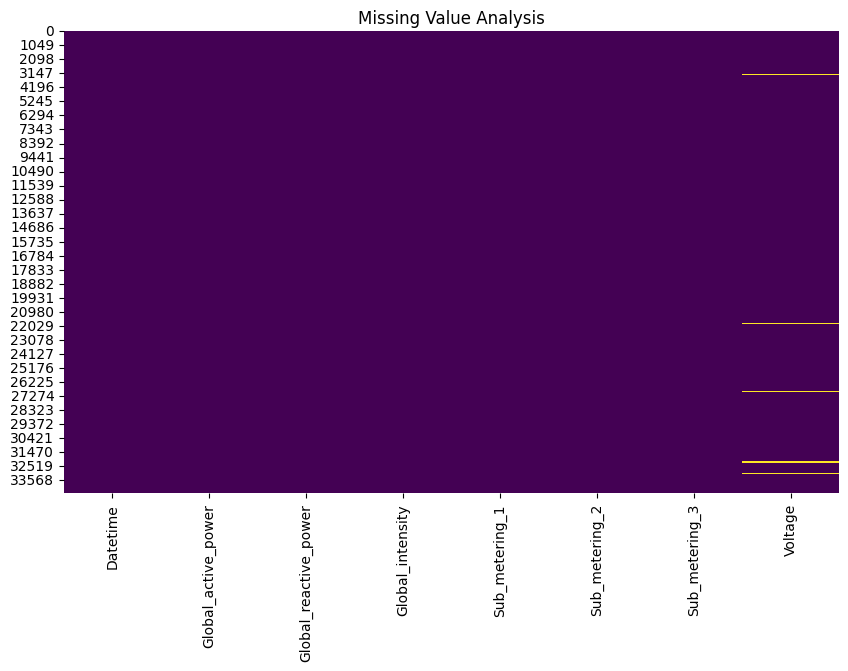

In [61]:
SimpleMisssingValueAnalysis().MissingValueAnalysis(df)

'Global_active_power' is a numerical feature.


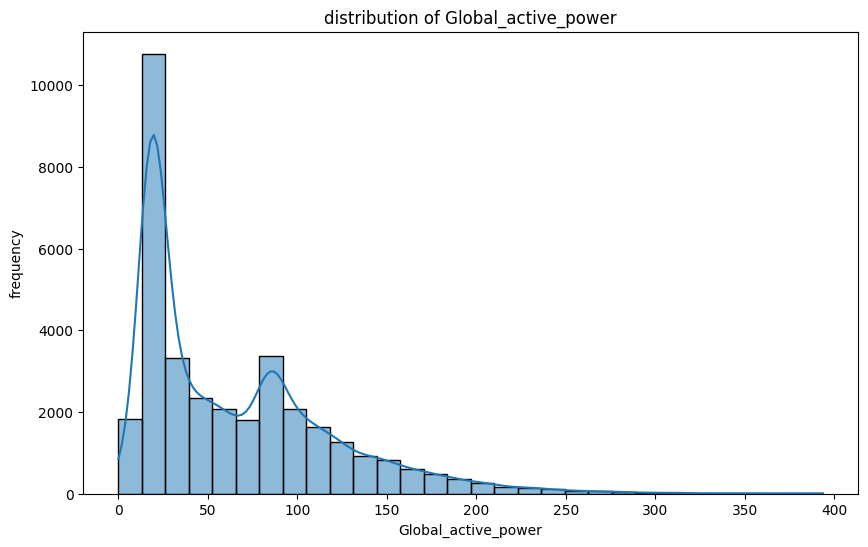

In [62]:
# Q1 = df['Global_active_power'].quantile(0.25)
# Q3 = df['Global_active_power'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[(df['Global_active_power'] >= Q1 - 1.5 * IQR) & 
#         (df['Global_active_power'] <= Q3 + 1.5 * IQR)]

# df['Global_active_power'] = np.log1p(df['Global_active_power'])
UnivariateAnalyzer().execute_strategy(df, "Global_active_power")

'Global_active_power' is a numerical feature.


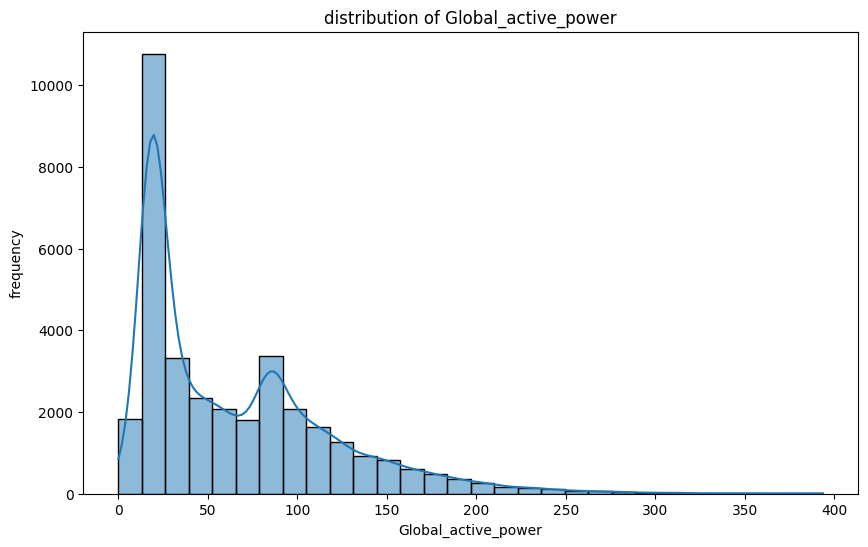

'Global_reactive_power' is a numerical feature.


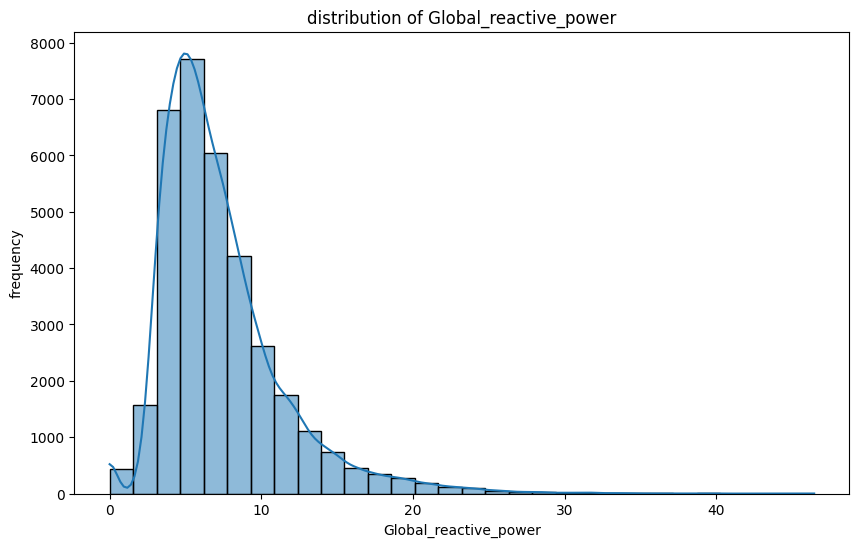

'Voltage' is a numerical feature.


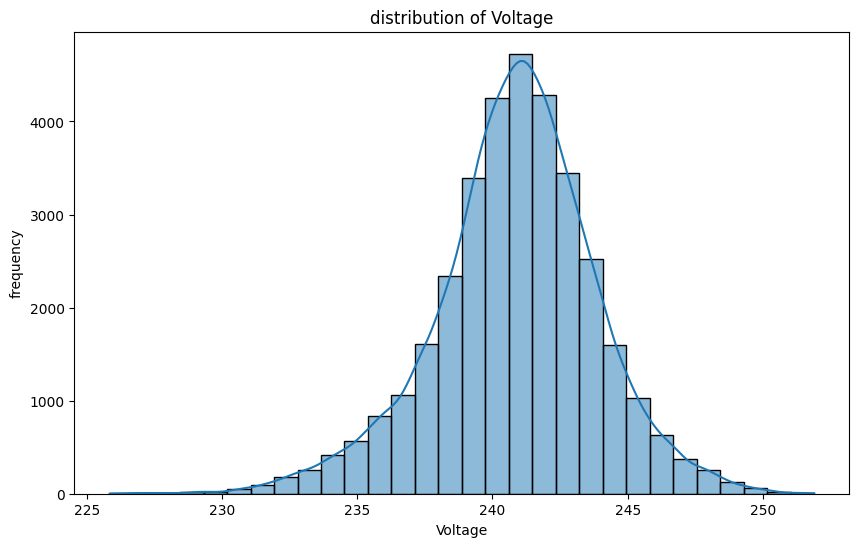

'Global_intensity' is a numerical feature.


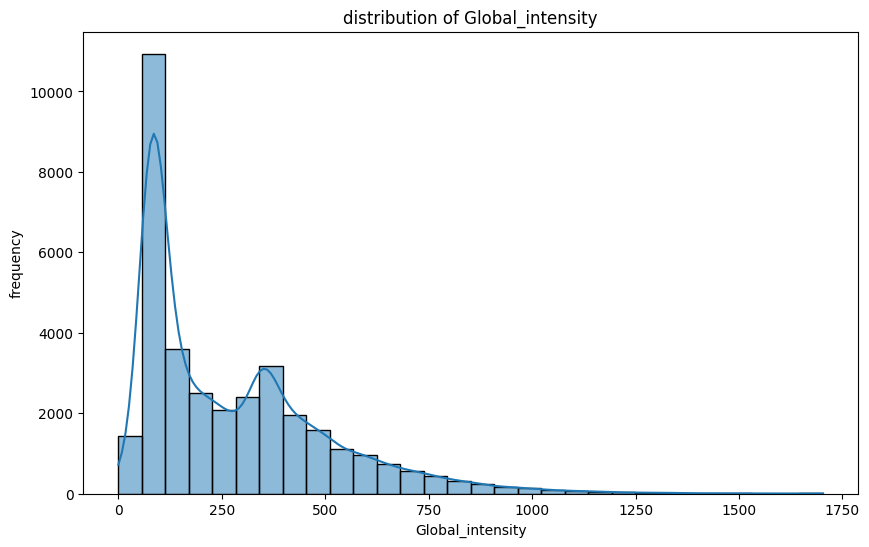

'Sub_metering_1' is a numerical feature.


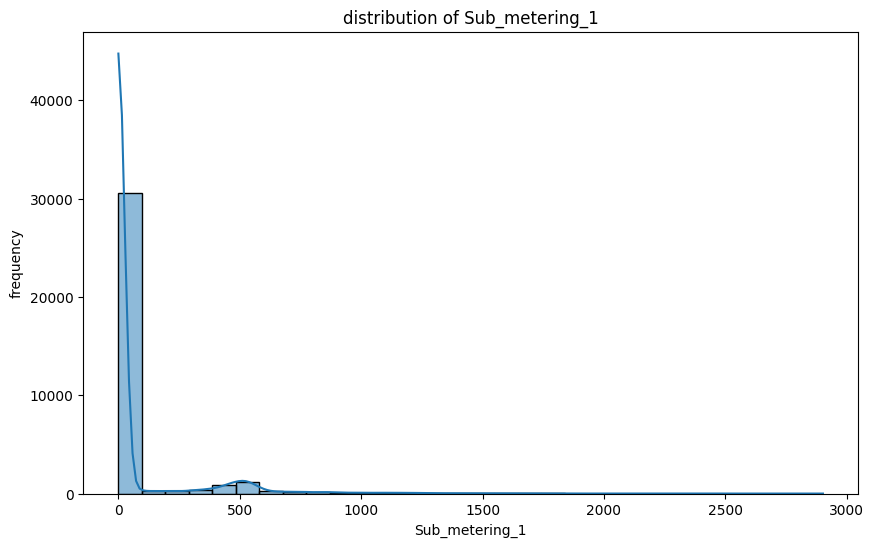

'Sub_metering_2' is a numerical feature.


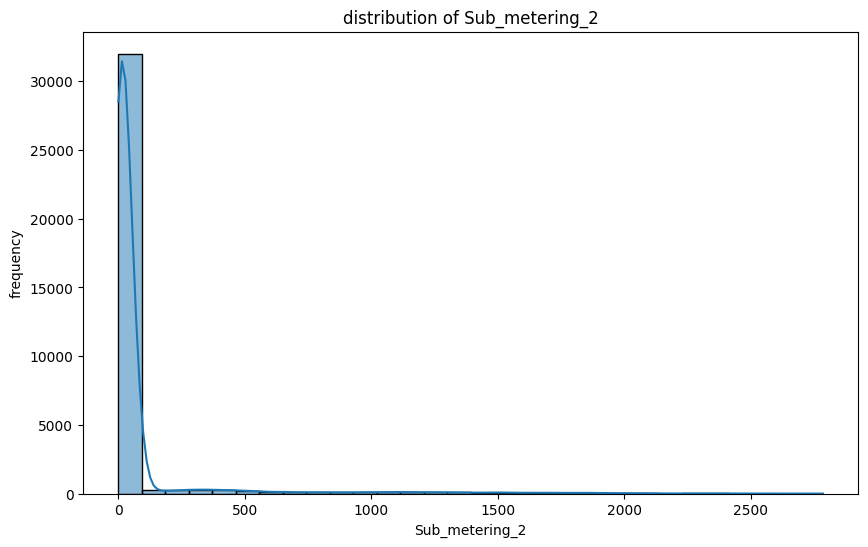

'Sub_metering_3' is a numerical feature.


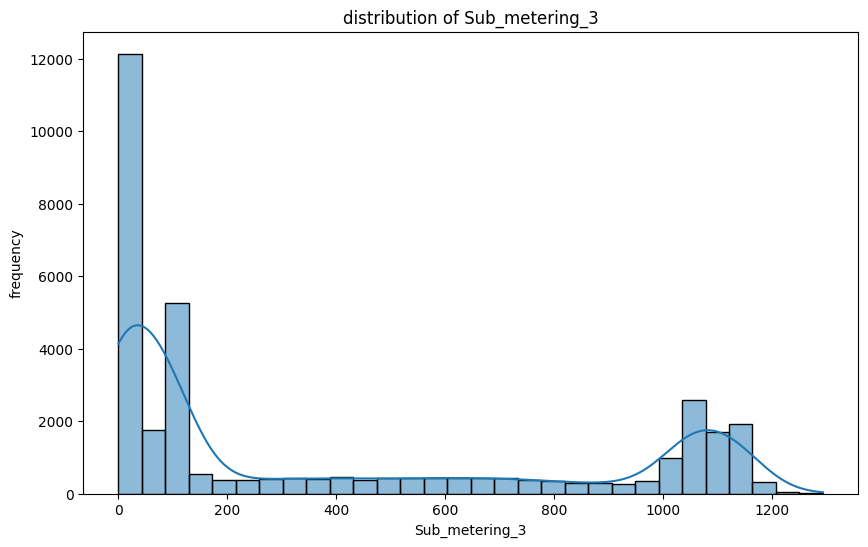

In [63]:
features = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

for feature in features:
    UnivariateAnalyzer().execute_strategy(df, feature)

'Global_active_power' and 'Global_intensity' are a numerical feature.


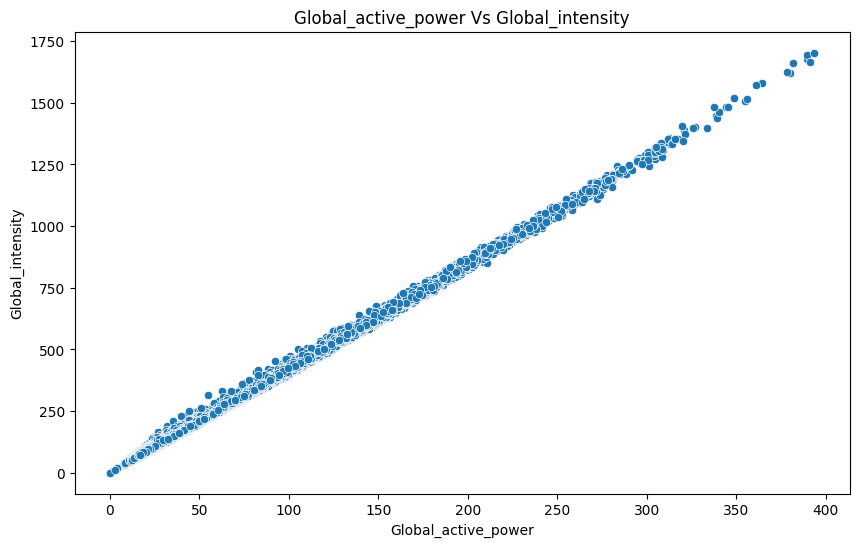

In [64]:
BivariateAnalyzer().execute_strategy(df, "Global_active_power", "Global_intensity")

'Voltage' and 'Global_intensity' are a numerical feature.


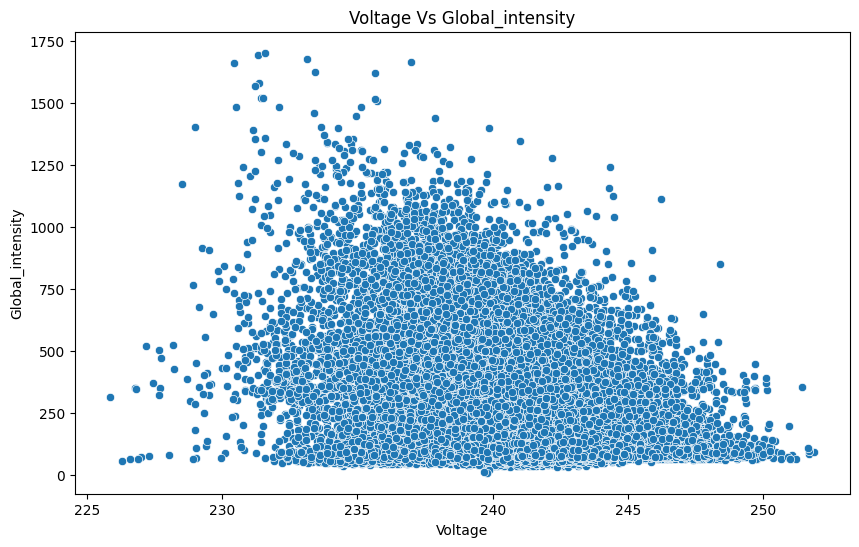

In [65]:
BivariateAnalyzer().execute_strategy(df, "Voltage", "Global_intensity")

'Global_active_power' and 'Global_reactive_power' are a numerical feature.


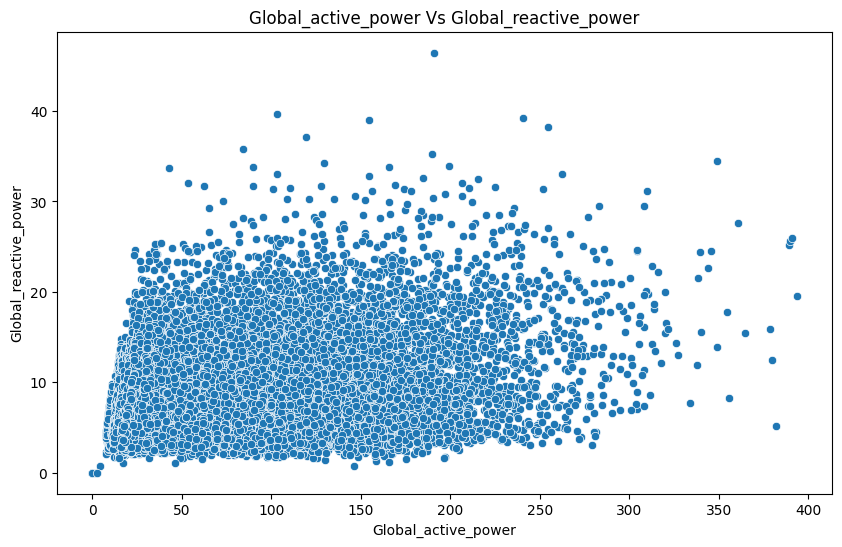

In [66]:
BivariateAnalyzer().execute_strategy(df, "Global_active_power", "Global_reactive_power")

'Global_reactive_power' and 'Global_intensity' are a numerical feature.


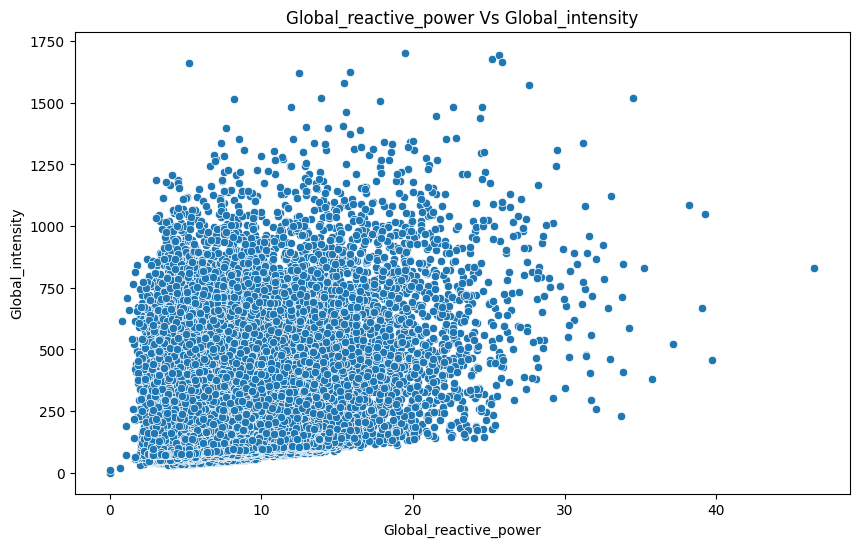

In [67]:
BivariateAnalyzer().execute_strategy(df, "Global_reactive_power", "Global_intensity")

'Global_active_power' and 'Sub_metering_1' are a numerical feature.


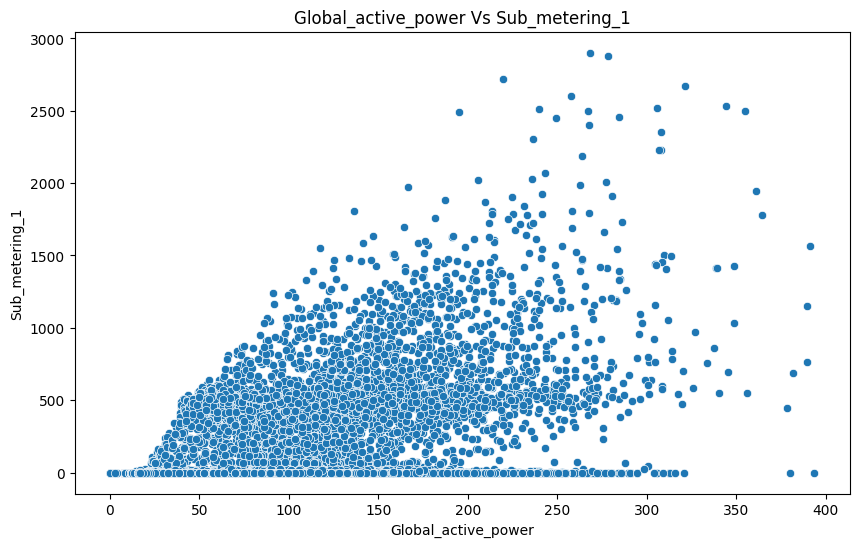

In [68]:
BivariateAnalyzer().execute_strategy(df, "Global_active_power", "Sub_metering_1")

'Global_active_power' and 'Sub_metering_2' are a numerical feature.


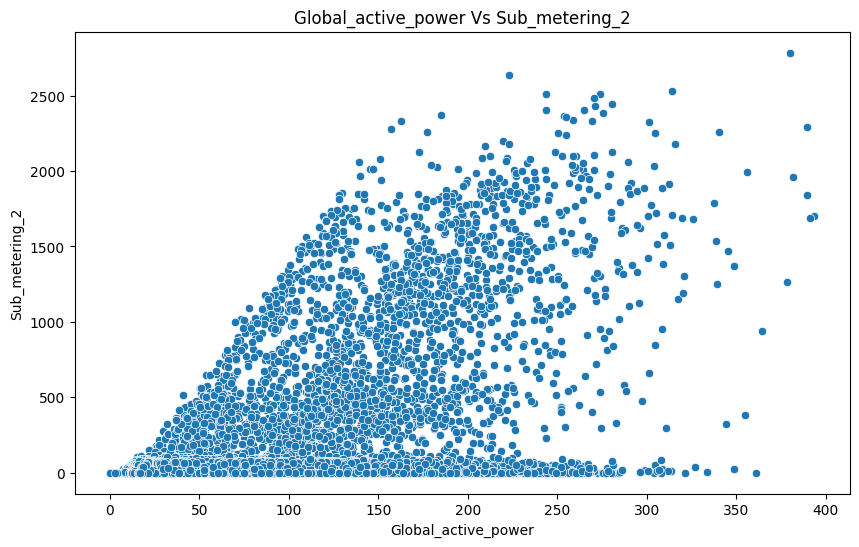

In [69]:
BivariateAnalyzer().execute_strategy(df, "Global_active_power", "Sub_metering_2")

'Sub_metering_1' and 'Sub_metering_2' are a numerical feature.


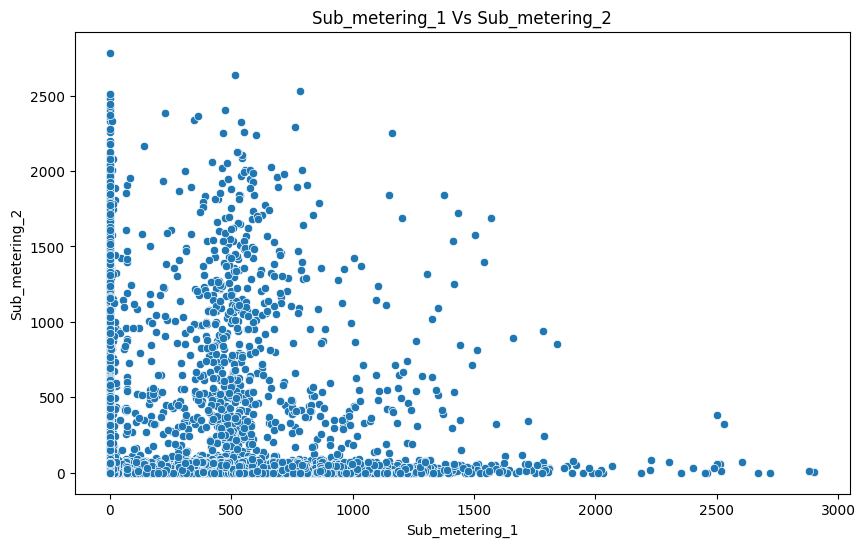

In [70]:
BivariateAnalyzer().execute_strategy(df, "Sub_metering_1", "Sub_metering_2")

'Sub_metering_1' and 'Sub_metering_3' are a numerical feature.


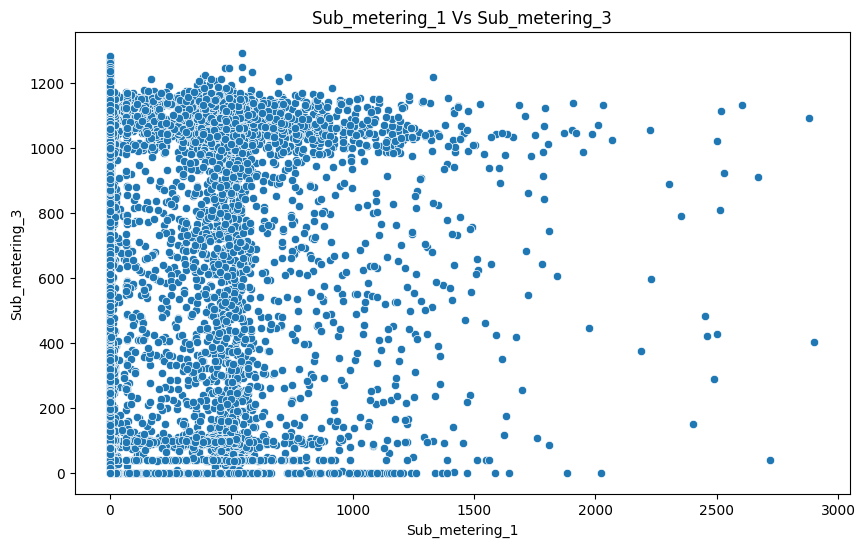

In [71]:
BivariateAnalyzer().execute_strategy(df, "Sub_metering_1", "Sub_metering_3")

'Sub_metering_2' and 'Sub_metering_3' are a numerical feature.


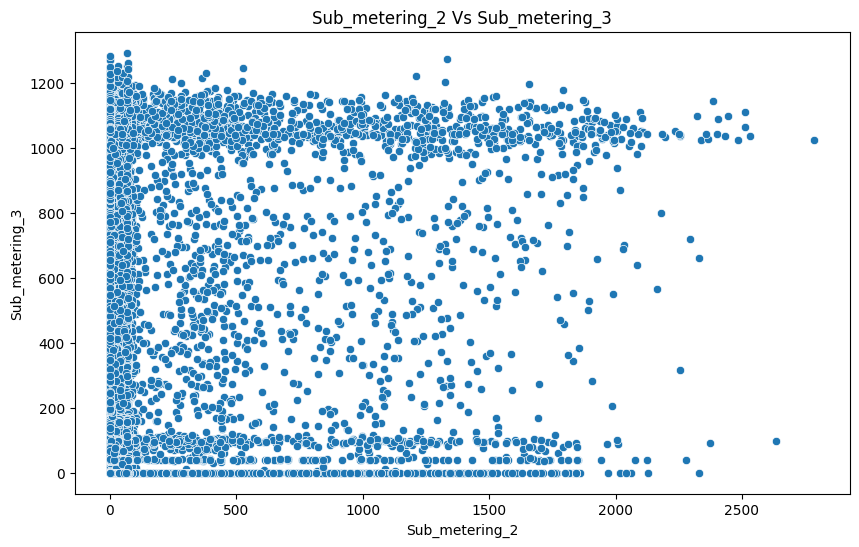

In [72]:
BivariateAnalyzer().execute_strategy(df, "Sub_metering_2", "Sub_metering_3")

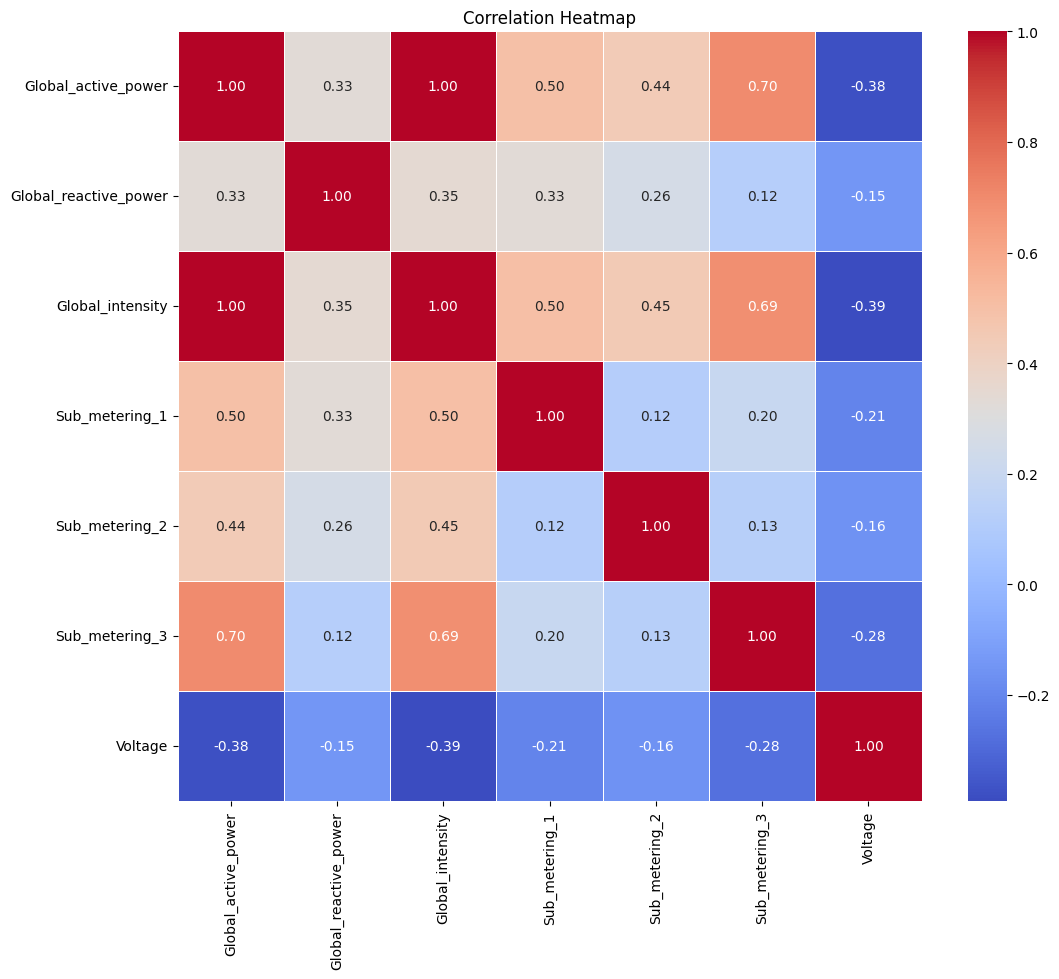

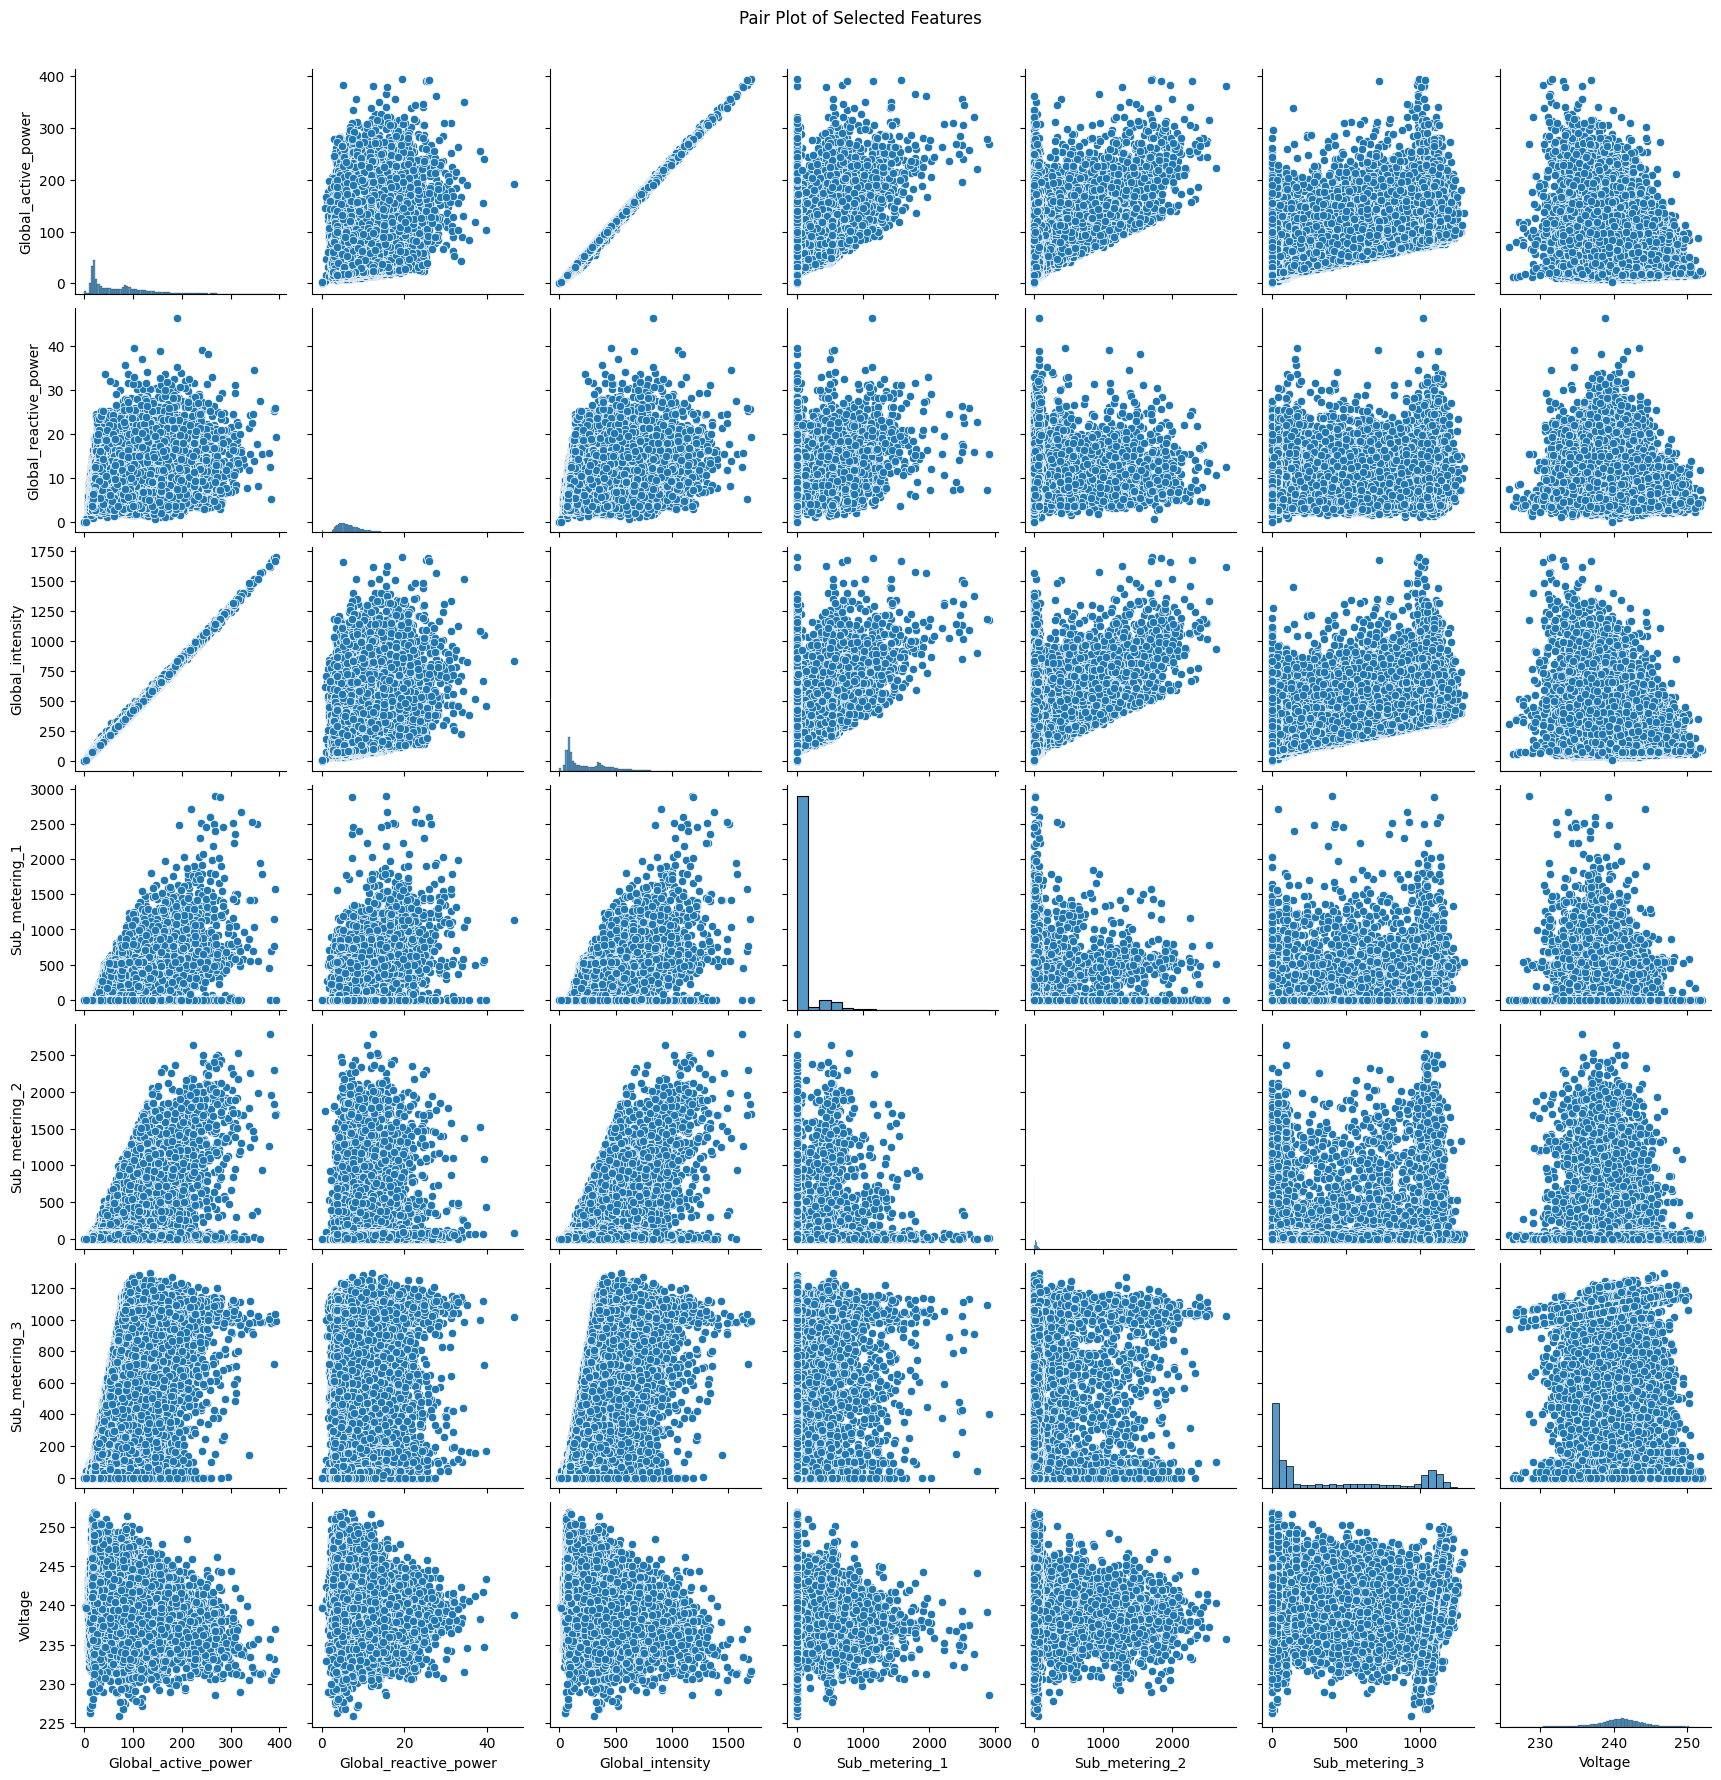

In [73]:
SimpleMultivariateAnalysis().analyze(df.drop(columns=['Datetime']))